In [26]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [27]:
template_dir = 'templates'
templates = {}

for template_file in os.listdir(template_dir):
    if template_file.endswith('.jpg'):
        template_name = template_file.split('.')[0]
        template_path = os.path.join(template_dir, template_file)
        templates[template_name] = cv2.imread(template_path)

def match_template(card_image, template_image):
    # Convert the template to grayscale (if needed)
    template_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)
    
    # Apply template matching
    result = cv2.matchTemplate(card_image, template_gray, cv2.TM_CCOEFF_NORMED)
    
    # Get the best match position
    _, max_val, _, max_loc = cv2.minMaxLoc(result)
    
    return round(max_val, 4), max_loc

In [28]:
def imshow(img, ax=None, cmap='gray'):
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt
    ax.imshow(img, cmap=cmap)
    ax.axis('off')

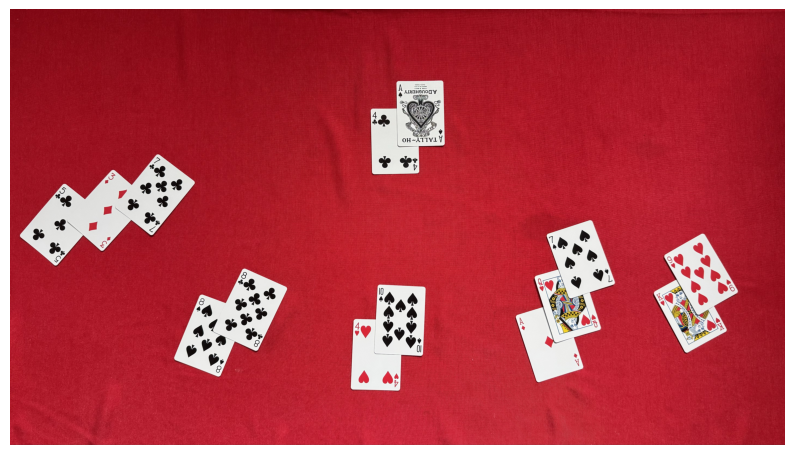

In [29]:
image_path = "database/IMG_2531.jpeg"  # Path to your uploaded image
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
imshow(image, cmap=None)

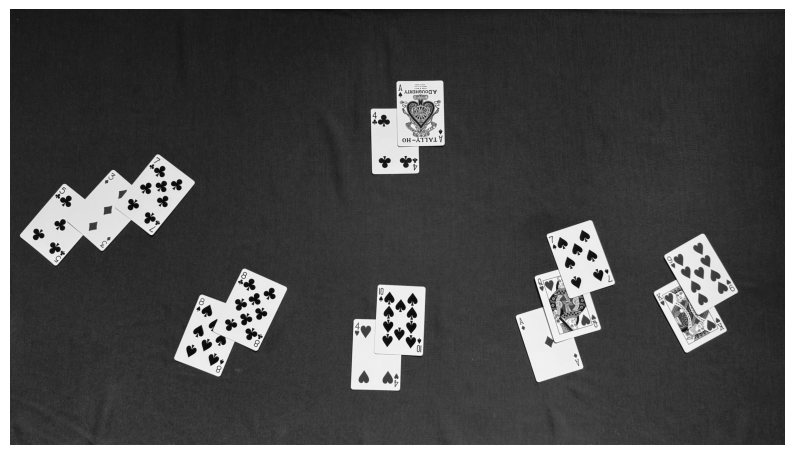

In [30]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(gray)

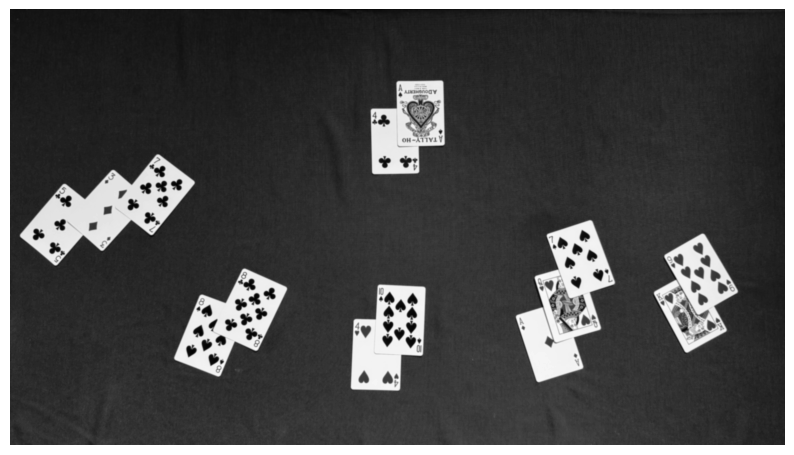

In [31]:
blur = cv2.GaussianBlur(gray, (21, 21), 0)
imshow(blur)

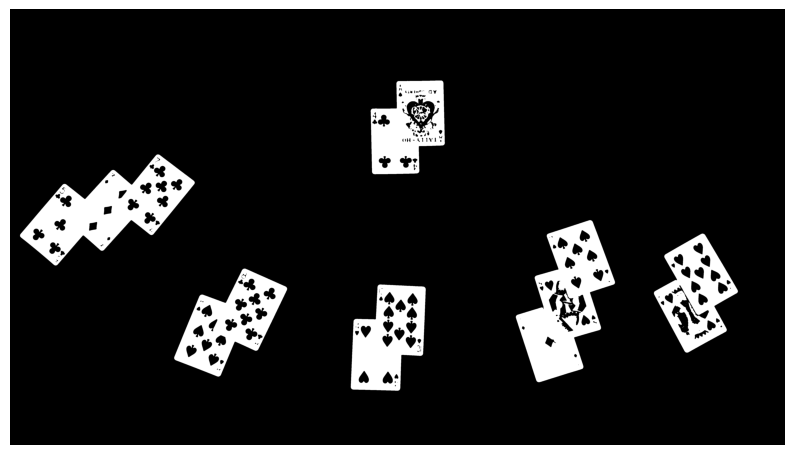

In [32]:
_, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(thresh)

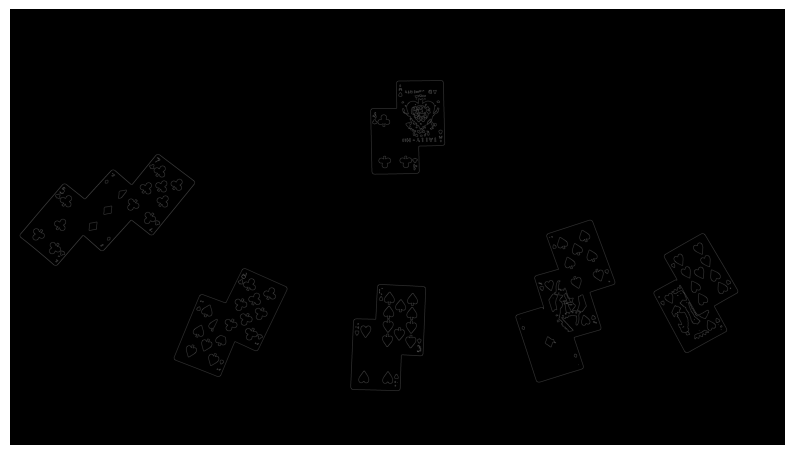

In [33]:
edges = cv2.Canny(thresh, 50, 150)
imshow(edges)

In [34]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
threshold_min_area = 50_000
number_of_contours = 0

bounding_rects = []

for c in contours:
    area = cv2.contourArea(c)
    if area > threshold_min_area:
        # cv2.drawContours(image, [c], 0, (0, 255, 0), 22)
        number_of_contours += 1
        
        x, y, w, h = cv2.boundingRect(c)
        bounding_rects.append((x, y, w, h, c))

Contours detected: 6


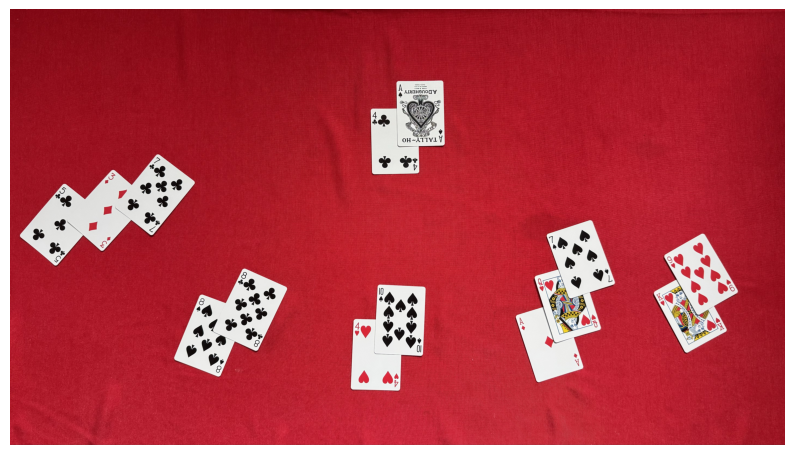

In [35]:
print("Contours detected:", number_of_contours)
imshow(image)

In [36]:
def get_cropped_image(image, bounding_rect):
    x, y, w, h, c = bounding_rect
    
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [c], -1, (255, 255, 255), thickness=cv2.FILLED)
    masked_image = cv2.bitwise_and(image, mask)
    cropped_image = masked_image[y:y+h, x:x+w]
    
    return cropped_image

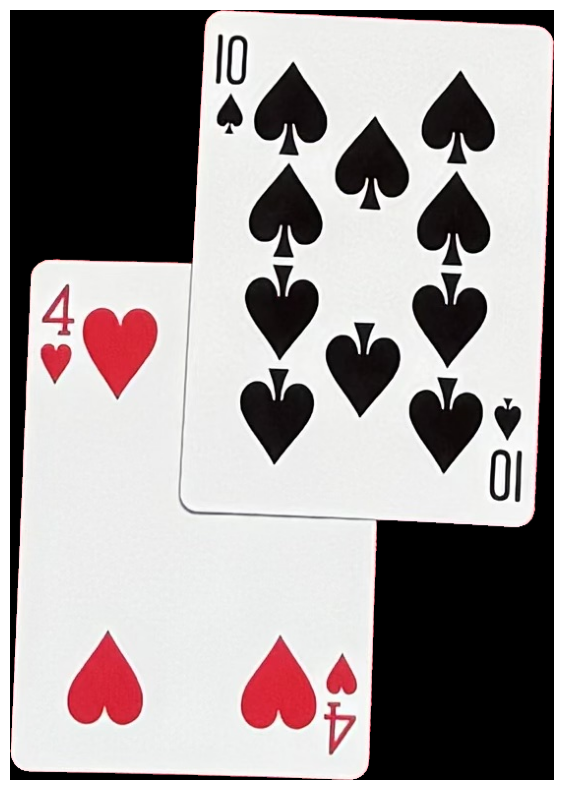

In [37]:
imshow(get_cropped_image(image, bounding_rects[0]))